In [ ]:
!cat 'example.txt'
#!type example.txt

In [25]:
import json
import pandas as pd

'''
records = []
for line in open('example.txt'):
    records.append(json.loads(line))

records
'''
#原生python
records = [json.loads(line) for line in open('example.txt')]
tzs = []
for rec in records:
    if 'tz' in rec:
        #print(rec['tz'])
        tzs.append(rec['tz'])
tzsSeries = pd.Series(tzs)
tzsSeries

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3435       America/New_York
3436        America/Chicago
3437         America/Denver
3438    America/Los_Angeles
3439       America/New_York
Length: 3440, dtype: object

In [22]:
#使用pandas處理
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
a              3440 non-null object
c              2919 non-null object
nk             3440 non-null float64
tz             3440 non-null object
gr             2919 non-null object
g              3440 non-null object
h              3440 non-null object
l              3440 non-null object
al             3094 non-null object
hh             3440 non-null object
r              3440 non-null object
u              3440 non-null object
t              3440 non-null float64
hc             3440 non-null float64
cy             2919 non-null object
ll             2919 non-null object
_heartbeat_    120 non-null float64
kw             93 non-null object
dtypes: float64(4), object(14)
memory usage: 500.8+ KB


In [29]:
clean_tz = frame['tz'].fillna('遺失的資料')
clean_tz[:20]

0        America/New_York
1          America/Denver
2        America/New_York
3       America/Sao_Paulo
4        America/New_York
5        America/New_York
6           Europe/Warsaw
7                        
8                        
9                        
10    America/Los_Angeles
11       America/New_York
12       America/New_York
13                  遺失的資料
14       America/New_York
15         Asia/Hong_Kong
16         Asia/Hong_Kong
17       America/New_York
18         America/Denver
19            Europe/Rome
Name: tz, dtype: object

In [32]:
clean_tz[clean_tz == ''] = '不明'

In [34]:
clean_tz

0          America/New_York
1            America/Denver
2          America/New_York
3         America/Sao_Paulo
4          America/New_York
               ...         
3555       America/New_York
3556        America/Chicago
3557         America/Denver
3558    America/Los_Angeles
3559       America/New_York
Name: tz, Length: 3560, dtype: object

In [37]:
#clean_tz.groupby(clean_tz).size()

tz
Africa/Cairo             3
Africa/Casablanca        1
Africa/Ceuta             2
Africa/Johannesburg      1
Africa/Lusaka            1
                      ... 
Europe/Zurich            4
Pacific/Auckland        11
Pacific/Honolulu        36
不明                     521
遺失的資料                  120
Name: tz, Length: 98, dtype: int64

In [41]:
tz_counts = clean_tz.value_counts()
tz10 = tz_counts[:10]
tz10

America/New_York       1251
不明                      521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
遺失的資料                   120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<IPython.core.display.Javascript object>


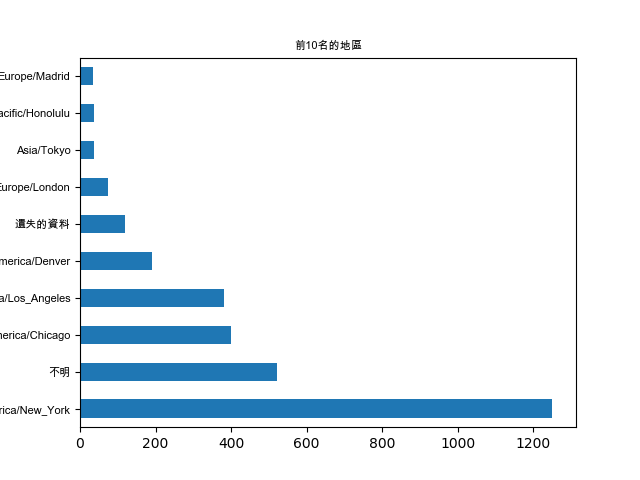

[Text(0, 0, 'America/New_York'),
 Text(0, 0, '不明'),
 Text(0, 0, 'America/Chicago'),
 Text(0, 0, 'America/Los_Angeles'),
 Text(0, 0, 'America/Denver'),
 Text(0, 0, '遺失的資料'),
 Text(0, 0, 'Europe/London'),
 Text(0, 0, 'Asia/Tokyo'),
 Text(0, 0, 'Pacific/Honolulu'),
 Text(0, 0, 'Europe/Madrid')]

In [49]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

font=FontProperties(fname='/Library/Fonts/Arial Unicode.ttf',size=8)
figure, ax1 = plt.subplots()
tz10.plot(kind='barh',ax=ax1)
ax1.set_title('前10名的地區', fontproperties=font)
ax1.set_yticklabels(tz10.index, fontproperties=font)

<IPython.core.display.Javascript object>


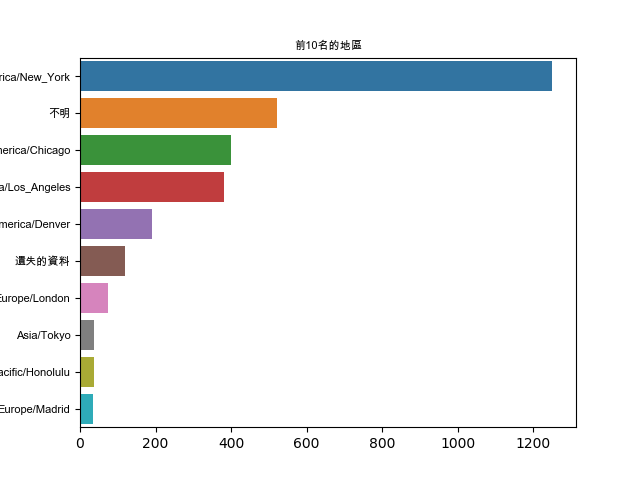

[Text(0, 0, 'America/New_York'),
 Text(0, 0, '不明'),
 Text(0, 0, 'America/Chicago'),
 Text(0, 0, 'America/Los_Angeles'),
 Text(0, 0, 'America/Denver'),
 Text(0, 0, '遺失的資料'),
 Text(0, 0, 'Europe/London'),
 Text(0, 0, 'Asia/Tokyo'),
 Text(0, 0, 'Pacific/Honolulu'),
 Text(0, 0, 'Europe/Madrid')]

In [51]:
import seaborn as sns
figure, ax1 = plt.subplots(1,1)
sns.barplot(y=tz10.index, x=tz10.values)
ax1.set_title('前10名的地區', fontproperties=font)
ax1.set_yticklabels(tz10.index, fontproperties=font)